# Python: PyTorch & Pillow Testing for Object Detection
## Tutorial used for testing: https://learnopencv.com/pytorch-for-beginners-image-classification-using-pre-trained-models/

In [1]:
from torchvision import models # Pre-trained models
from torchvision import transforms # Image pre-processing
import torch
from PIL import Image # Import Pillow
from torchvision.models import AlexNet_Weights

In [2]:
alexnet = models.alexnet(weights=AlexNet_Weights.IMAGENET1K_V1)

#print(dir(models)) # Prints a list of available models included with torchvision to use (tutorial suggests AlexNet)

In [3]:
# Image pre-processing
transform = transforms.Compose([            #[1]: defining transformed (processed) image
 transforms.Resize(256),                    #[2] Resize image to 256x256
 transforms.CenterCrop(224),                #[3] Crop image to 224x224 about the center
 transforms.ToTensor(),                     #[4] Convert image to PyTorch Tensor data type
 transforms.Normalize(                      #[5-7] Normalize image
 mean=[0.485, 0.456, 0.406],                
 std=[0.229, 0.224, 0.225]                  
 )])

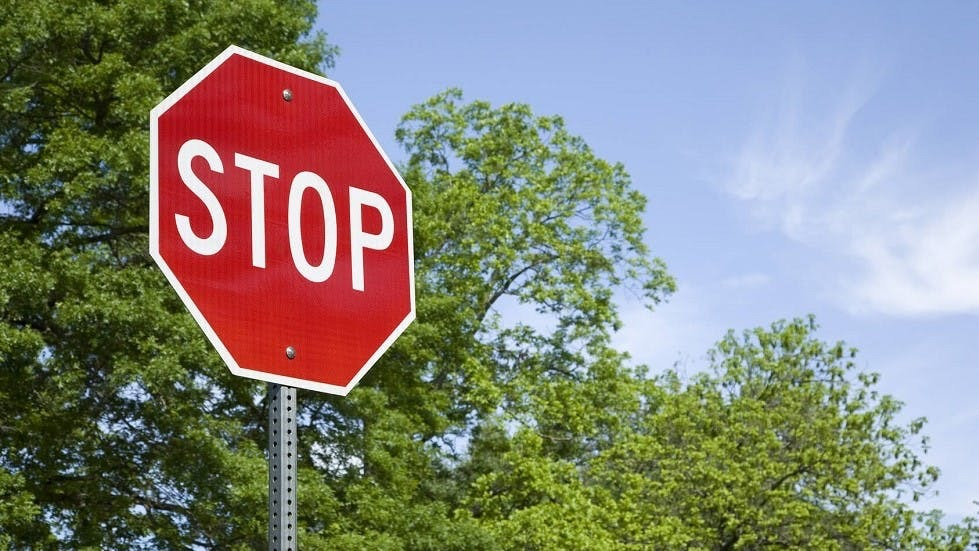

In [4]:
 # Load input image via Pillow
img = Image.open("SimpleTestImages/stopsign.jpg")
img.show() # Shows image

In [5]:
# Pre-process image and prepare a batch to be passed through network
img_t = transform(img)
batch_t = torch.unsqueeze(img_t,0)

In [6]:
# Put model in evaluation mode
alexnet.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [7]:
# Carry out the inference
out = alexnet(batch_t)

In [8]:
# Read and store the labels from a text file containing 1000 labels
with open('TextFileStorage/imagenet_classes.txt') as f:
  classes = [line.strip() for line in f.readlines()]

In [9]:
# Find label with max score (best prediction)
_, index = torch.max(out, 1)

In [10]:
# Calculate percent confidence
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100

In [11]:
# Print best guess and percent confidence
print(classes[index[0]], percentage[index[0]].item())

street sign 96.6347427368164


In [12]:
# Show top 5 guesses with percent confidence
_, indices = torch.sort(out, descending=True)
[(classes[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('street sign', 96.6347427368164),
 ('water tower', 1.1018303632736206),
 ('balloon', 0.9620421528816223),
 ('barn', 0.2691412568092346),
 ('traffic light, traffic signal, stoplight', 0.268784761428833)]

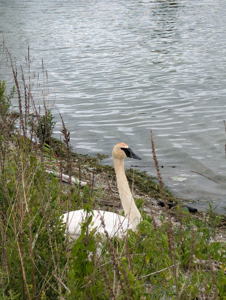

[('limpkin, Aramus pictus', 23.67369270324707),
 ('lakeside, lakeshore', 16.843914031982422),
 ('redshank, Tringa totanus', 13.910346031188965),
 ('bittern', 8.39517879486084),
 ('dowitcher', 7.836606979370117)]

In [25]:
 # Load input image via Pillow
img = Image.open("SimpleTestImages/animal_test.jpg")
img_t = transform(img)
batch_t = torch.unsqueeze(img_t,0)

# The following 2 lines is just to show the image in the notebook (in a smaller size)
size = 300, 300
img.show(img.thumbnail(size))

# Carry out the inference
out = alexnet(batch_t)
_, index = torch.max(out, 1)
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
_, indices = torch.sort(out, descending=True)
[(classes[idx], percentage[idx].item()) for idx in indices[0][:5]]

### Analyzing the results
The top 5 results are as follows:

1) Limpkin - Type of Bird
2) Lakeside / Lakeshore
3) Redshank - Type of Bird
4) Bittern - Type of Bird
5) Dowitcher - Type of Bird

This image shows a swan (based on a reverse Google image search, it appears to be a Trumpeter or Tundra swan). While the results are not exact (reasonable based on the confidence %'s being 24% or lower, compared to 96% for the stop sign above), it did correctly guess it is a bird and there is a lakeshore in the image.